### Homework 2.2 - Heat Transfer

Use the finite differential method to solve a heat transfer equation, given by

$$ \frac{{\partial T}}{{\partial t}} = k\frac{{{\partial ^2}T}}{{\partial {x^2}}} $$

where $T(t, x)$ is the temperature distribution function.

Solve the equation for $x$ between 0 and 1. At $x=0$ the temperature varies as $T(t,0)=sin(10t)$ and at At $x=1$ the temperature varies as $T(t,0)=e^{ - 100 (t - 0.15)^2}$.

Make the animated clip of the temperature distribution function evolution. Pick appropriate time range.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib inline

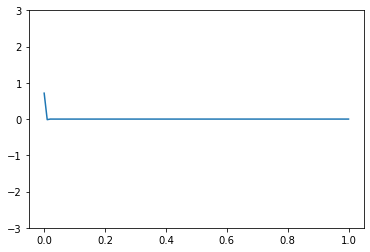

In [43]:
N=100

x = np.linspace(0,1, num=N + 1, endpoint=True)
Tx0 = np.zeros(N+1)

# ensuring both ends are fixed at zero

Told = Tx0
# Set up initial condition for the time derivative at t = 0
dTx0 = np.zeros(N+1)

k = 6
dt = 1 # Set up time step size
eta = 0.01 # Spatial step size

eps = (k*eta/(dt**2))

# Calculate time step j = 1
Txj = np.zeros(N+1)
for i in np.linspace(1, N-1, N-1, dtype=int):
    Txj[i] = 0.5*eps*(Tx0[i+1] + Tx0[i-1]) + (1. - eps)*(Tx0[i]) + dTx0[i]*dt

TAll = np.array([Txj])
fig1 = plt.figure()
l = plt.plot(x, Txj)
axes = plt.gca()
axes.set_ylim([-3,3])
# axes.set_xlim([-3,3])

for j in range(200):
    Tnew = np.zeros(N+1)
    Tnew[0] = np.sin(10*j)
    Tnew[-1] = np.exp(-100*(j-0.15)**2)
    for i in np.linspace(1, N-1, N-1, dtype=int):
        Tnew[i] = eps*(Txj[i+1] -2*Txj[i]+ Txj[i-1]) + Txj[i]
    Told = Txj
    Txj = Tnew
    TAll = np.vstack([TAll, Tnew])
        
def update_line(num, line):
    line.set_data(x, TAll[num])
    return line,
        
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
# line_ani.save('wave-in-string.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
writergif = animation.PillowWriter(fps=30)
line_ani.save('2-2_wave.gif',writer=writergif)
plt.show()